# DATASCI W261: Machine Learning at Scale
## Assignment Week 6
Miki Seltzer (miki.seltzer@berkeley.edu)<br>
W261-2, Spring 2016<br>
Submission: 

## HW6.0
### In mathematics, computer science, economics, or management science what is mathematical optimization? Give an example of a optimization problem that you have worked with directly or that your organization has worked on. Please describe the objective function and the decision variables. Was the project successful (deployed in the real world)? Describe.

Mathematical optimization is the process of selecting the "best" value for a parameter. In our case, we are maximizing or minimizing an objective function, such as minimizing the mean squared error to find the best parameters for linear regression.

At a previous job, an optimization project that we worked on was to find the best way to word promotional banners on an e-commerce website. The objective "function" was how much revenue the promostion drove, and the decision variable was the wording of the headline on the promo banner. In this case, the project was not 100% successful, as A/B testing can be difficult to get statistically significant results.  If we had unlimited time to run the A/B test, we may have been able to iterate on the wording of the promotion for optimization.


## HW6.1 
### Optimization theory: For unconstrained univariate optimization what are the first order  Necessary Conditions for Optimality (FOC).  What are the second order optimality conditions (SOC)? Give a mathematical defintion. 

**FOC**
- A local extrema of $f(x)$ occurs when the first derivative is equal to zero, or $\nabla f(x) = 0$.

**SOC**
- A local extrema of $f(x)$ is a minimum if the second derivative evaluated at that point is positive ($\nabla^2 f(x) > 0$), and a maximum if the second derivative evaluated at that point is negative ($\nabla^2 f(x) < 0$).

### Also in Python, plot the univartiate function $x^3 -12x^2-6$ defined over the real  domain -6 to +6. 
### Also plot its corresponding first and second derivative functions. Eyeballing these graphs, identify candidate optimal points and then classify them as local minimums or maximums. Highlight and label these points in your graphs. Justify your responses using the FOC and SOC.


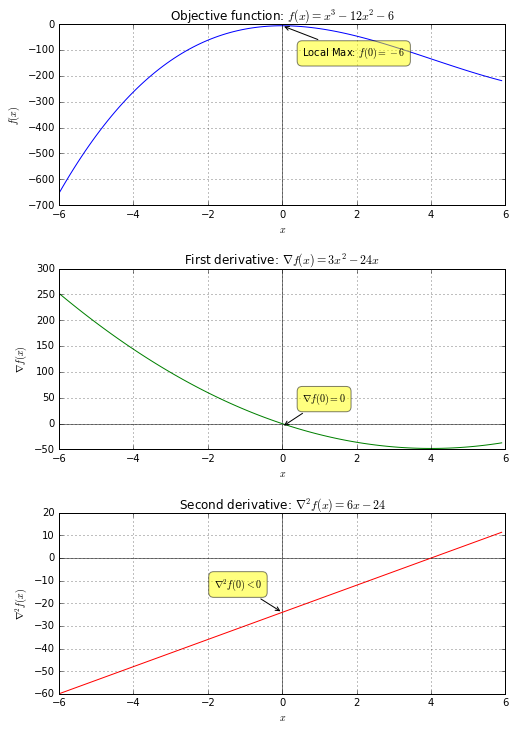

In [51]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

def plot_61():
    x = np.arange(-6, 6, 0.1)
    y = x ** 3 - 12 * x ** 2 - 6
    y_prime = 3 * x ** 2 - 24 * x
    y_2prime = 6 * x - 24
    
    plt.figure(figsize=(8,12))
    plt.subplots_adjust(hspace=0.35)
    
    plt.axhline(y=0, color='k')
    
    plt.subplot(3, 1, 1)
    plt.grid(True)
    plt.axhline(0, color='grey')
    plt.axvline(0, color='grey')
    plt.plot(x, y)
    plt.ylabel(r"$f(x)$")
    plt.xlabel(r"$x$")
    plt.title(r"Objective function: $f(x)=x^3-12x^2-6$")
    plt.annotate(r'Local Max: $f(0)=-6$', 
        xy = (0, -6), xytext = (20, -20),
        textcoords = 'offset points', ha = 'left', va = 'top',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
    
    plt.subplot(3, 1, 2)
    plt.grid(True)
    plt.axhline(0, color='grey')
    plt.axvline(0, color='grey')
    plt.plot(x, y_prime, color='green')
    plt.ylabel(r"$\nabla f(x)$")
    plt.xlabel(r"$x$")
    plt.title(r"First derivative: $\nabla f(x)=3x^2-24x$")
    plt.annotate(r'$\nabla f(0)=0$', 
        xy = (0, -6), xytext = (20, 20),
        textcoords = 'offset points', ha = 'left', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
    
    plt.subplot(3, 1, 3)
    plt.grid(True)
    plt.axhline(0, color='grey')
    plt.axvline(0, color='grey')
    plt.plot(x, y_2prime, color='red')
    plt.ylabel(r"$\nabla^2 f(x)$")
    plt.xlabel(r"$x$")
    plt.title(r"Second derivative: $\nabla^2 f(x)=6x-24$")
    plt.annotate(r'$\nabla^2 f(0)<0$', 
        xy = (0, -24), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
    
plot_61()

### For unconstrained multi-variate optimization what are the first order Necessary Conditions for Optimality (FOC).  What are the second order optimality conditions (SOC)? Give a mathematical defintion. What is the Hessian matrix in this context?

**FOC**
- A local extrema of $f(\mathbf{x})$ occurs when the first derivative (Jacobian matrix) has all entries equal to zero, or $J(\mathbf{x}) = 0$.

**SOC**
- A local extrema of $f(\mathbf{x})$ is a minimum if the second derivative (Hessian matrix) evaluated at that point has all entries positive ($H(\mathbf{x}) > 0$), and a maximum if the second derivative (Hessian matrix) evaluated at that point has all entries negative ($H(\mathbf{x}) < 0$).


## HW6.2: Taking x=1 as the first approximation($x_{t1}$) of a root of $x^3 + 2x -4 = 0$, use the Newton-Raphson method to calculate the second approximation (denoted as $x_{t2}$) of this root. (Hint the solution is $x_{t2}=1.2$)

Find value of $f(x)$ at $x_{t1}$
$$
\begin{equation}
\begin{split}
f(x) & = x^3+2x-4 \\
f(1) & = (1)^3+2(1)-4 \\
f(1) & = -1 \\
\end{split}
\end{equation}
$$

Find value of $\nabla f(x)$ at $x_{t1}$
$$
\begin{equation}
\begin{split}
\nabla f(x) & = 3x^2+2 \\
\nabla f(1) & = 3(1)^2+2 \\
\nabla f(1) & = 5 \\
\end{split}
\end{equation}
$$

Define line with slope = 5 and containing point (1, -1)
$$
\begin{equation}
\begin{split}
y-y_1&=m(x-x_1) \\
y+1&=5(x-1)
\end{split}
\end{equation}
$$

Find x-intercept of that line
$$
\begin{equation}
\begin{split}
y+1&=5(x-1) \\
0+1&=5(x-1) \\
0.2&=x-1 \\
x&=1.2
\end{split}
\end{equation}
$$



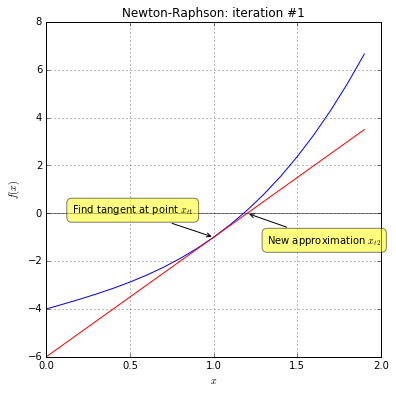

In [73]:
def plot_62():
    x = np.arange(0, 2, 0.1)
    y = x ** 3 + 2 * x - 4
    tangent = 5 * x - 6
    
    plt.figure(figsize=(6,6))

    plt.grid(True)
    plt.axhline(0, color='grey')
    plt.axvline(0, color='grey')
    plt.plot(x, y)
    plt.plot(x, tangent, color="red")
    plt.ylabel(r"$f(x)$")
    plt.xlabel(r"$x$")
    plt.title(r"Newton-Raphson: iteration #1")
    plt.annotate(r'Find tangent at point $x_{t1}$', 
        xy = (1,-1), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
    plt.annotate(r'New approximation $x_{t2}$', 
        xy = (1.2,0), xytext = (20, -20),
        textcoords = 'offset points', ha = 'left', va = 'top',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
    
plot_62()

## HW6.3 Convex optimization
### What makes an optimization problem convex? What are the first order Necessary Conditions for Optimality in convex optimization.  What are the second order optimality conditions for convex optimization? Are both necessary to determine the maximum or minimum of candidate optimal solutions?

An optimization problem is convex if the objective function we are minimizing is convex. We can think of a convex function as follows:
- If we look at the function and a tangent line at a specific point, the function globally lies above the tangent line
- If this is true for all points, the function is globally convex

**FOC**
- If the gradient of a convex function at a point is zero, than that point is a global minimum

**SOC**
- The second derivative of the function is positive semi-definite, so we know that the extrema found in the FOC is a minimum

If we know that the objective function is convex, we only need the first order condition to know that an optimal solution is a minimum. However, if the objective function is concave, we will have a global maximum.

### Fill in the BLANKS here:
Convex minimization, a subfield of optimization, studies the problem of minimizing **convex** functions over **convex** sets. The **convexity** property can make optimization in some sense "easier" than the general case - for example, any local minimum must be a global minimum.


## HW6.4
### The learning objective function for weighted ordinary least squares (WOLS) (aka weight linear regression) is defined as follows:
### $$0.5 \sum_i \text{weight}_i (W X_i - Y_i)^2$$
### The training set consists of input variables X ( in vector form) and a target variable Y, and W is the vector of coefficients for the linear regression model. Derive the gradient for this weighted OLS by hand; showing each step and also explaining each step.

We are given matrices of the following dimensions, when we have N observations with M variables:

$$
\mathbf{Y}=\begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_N
\end{bmatrix}
, \mathbf{X}=\begin{bmatrix}
x_{11} & x_{12} & \ldots & x_{1M} \\
x_{21} & x_{22} & \ldots & x_{2M} \\
\vdots & \vdots & \ddots & \vdots \\
x_{N1} & x_{N2} & \ldots & x_{NM} 
\end{bmatrix}
, \mathbf{W}=\begin{bmatrix}
W_1 \\
W_2 \\
\vdots \\
W_M
\end{bmatrix}
, \boldsymbol{\beta}\text{ (weights)}=\begin{bmatrix}
\beta_1 \\
\beta_2 \\
\vdots \\
\beta_N
\end{bmatrix}
$$

We want to minimize the learning objective function:
$$
\begin{equation}
\begin{split}
\mathbf{W^*} &= \underset{x}{\text{min}} \bigg(\frac{1}{2} \sum_i \beta_i (\mathbf{X_i} \mathbf{W} - \mathbf{Y_i})^2\bigg) \\
&= \underset{\mathbf{W}}{\text{min}} \bigg(\frac{1}{2} \sum_i \beta_i (\mathbf{X_i} \mathbf{W} - \mathbf{Y_i})^T (\mathbf{X_i} \mathbf{W} - \mathbf{Y_i})\bigg) \\
&= \underset{\mathbf{W}}{\text{min}} \bigg(\frac{1}{2} \sum_i \beta_i (\mathbf{W}^T \mathbf{X_i}^T - \mathbf{Y_i}^T)  (\mathbf{X_i} \mathbf{W} - \mathbf{Y_i})\bigg) \\
&= \underset{\mathbf{W}}{\text{min}} \bigg(\frac{1}{2} \sum_i \beta_i (\mathbf{W}^T\mathbf{X_i}^T\mathbf{X_i}\mathbf{W} - \mathbf{W}^T\mathbf{X_i}^T\mathbf{Y_i} - \mathbf{Y_i}^T\mathbf{X_i}\mathbf{W} + \mathbf{Y_i}^T\mathbf{Y_i})\bigg)
\end{split}
\end{equation}
$$

To find the minimum, we differentiate with respect to $\mathbf{W}$ to get the gradient:

$$
\begin{equation}
\begin{split}
\nabla &= \frac{1}{2} \sum_i \beta_i \bigg(2\mathbf{X_i}^T\mathbf{X_i}\mathbf{W} - 2 \mathbf{X_i}^T\mathbf{Y_i} \bigg) \\
&= \sum_i \beta_i \bigg(\mathbf{X_i}^T\mathbf{X_i}\mathbf{W} - \mathbf{X_i}^T\mathbf{Y_i} \bigg)
\end{split}
\end{equation}
$$

## HW 6.5
### Write a MapReduce job in MRJob to do the training at scale of a weighted OLS model using gradient descent.

### Generate one million datapoints just like in the following notebook:  http://nbviewer.ipython.org/urls/dl.dropbox.com/s/kritdm3mo1daolj/MrJobLinearRegressionGD.ipynb

### Weight each example as follows: $\text{weight}(x)= \big|\frac{1}{x}\big|$

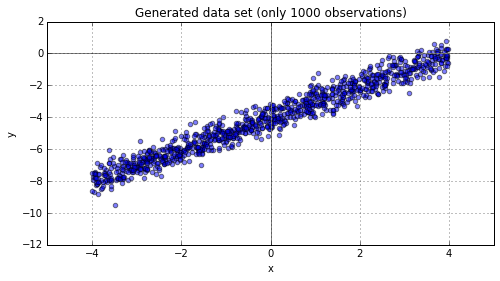

In [163]:
import numpy as np
import matplotlib.pyplot as plt

size = 1000000
x = np.random.uniform(-4, 4, size)
y = x * 1.0 - 4 + np.random.normal(0,0.5,size)
weight = abs(1/x)
data = zip(y, x, weight)
np.savetxt('LinearRegression.csv',data,delimiter = ",")

def plot_points():
    plt.figure(figsize=(8,4))
    plt.grid(True)
    plt.axhline(0, color='grey')
    plt.axvline(0, color='grey')
    plt.scatter(x[:1000], y[:1000], marker='o', alpha=0.5)
    plt.title('Generated data set (only 1000 observations)')
    plt.xlabel('x')
    plt.ylabel('y')
    
plot_points()

### MRJob calculates gradient in each iteration

In [1]:
# We will need these so we can reload modules as we modify them
%load_ext autoreload
%autoreload 2

In [118]:
%%writefile MRJob_WOLSviaGD_Batch.py
from mrjob.job import MRJob
from mrjob.step import MRStep

class WOLSviaGD_Batch(MRJob):
    
    """
    Initialize coefficients
    - coefficients are in coefs.txt
    """
    def initializeCoefs(self):
        
        # Read in coefficients
        with open('coefs.txt','r') as f:
            self.coefs = [float(x) for x in f.readline().split(',')]
        
        # Initialize gradient for this iteration
        self.partialGradient = [0]*len(self.coefs)
        self.partialCount = 0
    
    """
    Calculate partial gradient for each example
    - we need to multiply by the weight in WOLS
    - keep partial sums in memory
    """
    def calculatePartialGradient(self, _, line):
        
        # D is one observation of our data
        # The observations are in the form (y, x, weight)
        D = (map(float, line.split(',')))
        y = D[0]
        x = D[1]
        weight = D[2]
        
        # yHat is the predicted value given current coefficients
        yHat = self.coefs[0] + self.coefs[1] * x
        
        # Update partial gradient with gradient from D
        self.partialGradient = [self.partialGradient[0] + (y - yHat) * weight,
                                self.partialGradient[1] + (y - yHat) * x * weight]
        self.partialCount += 1
        
    """
    Yield partial gradient when mapper is done
    """
    def emitPartialGradient(self):
        yield None, (self.partialGradient, self.partialCount)
        
    """
    Aggregate all partial gradients to output gradient vector
    """
    def calculateGradient(self, _, partialGradientRecords):
        
        # Initialize totals
        totalGradient = [0]*2
        totalCount = 0

        # Accumulate
        for partialGradient, partialCount in partialGradientRecords:
            totalCount += partialCount
            for i in range(len(totalGradient)):
                totalGradient[i] += partialGradient[i]
        
        # Emit total gradient
        yield None, [x / totalCount for x in totalGradient]
        
    """
    Multistep pipeline definition
    """
    def steps(self):
        return [
                MRStep(mapper_init=self.initializeCoefs,
                       mapper=self.calculatePartialGradient,
                       mapper_final=self.emitPartialGradient,
                       reducer=self.calculateGradient)
            ]
    
if __name__ == '__main__':
    WOLSviaGD_Batch.run()

Overwriting MRJob_WOLSviaGD_Batch.py


### Driver

In [150]:
from numpy import random, array
from MRJob_WOLSviaGD_Batch import WOLSviaGD_Batch

learningRate = 0.05
stopCriteria = 0.00001

# Generate random values as inital coefficients
coefs = array([random.uniform(-3,3),random.uniform(-3,3)])

# Write the weights to the files
with open('coefs.txt', 'w') as f:
    f.writelines(','.join(str(j) for j in coefs))
    
# Create our MRJob
mr_job = WOLSviaGD_Batch(args=['LinearRegression.csv', '--file', 'coefs.txt', '--no-strict-protocol'])

# Initialize count
i = 0

print '{:10s}{:>10s}{:>10s}'.format('Iteration', 'Intercept', 'Slope')
print '-------------------------------'

while(1):
    print '{:<10d}{:>10.4f}{:>10.4f}'.format(i, coefs[0], coefs[1])
    
    # Save old weights so we can determine stop criteria
    oldCoefs = array(coefs)
    
    # MRJob
    with mr_job.make_runner() as runner:
        runner.run()
        
        # Stream output
        for line in runner.stream_output():
            
            # key is None, value is gradient
            key, value = mr_job.parse_output_line(line)
            
            # Update coefficients
            coefs += learningRate * array(value)
            
    i += 1
    
    # Update coefs.txt file
    with open('coefs.txt', 'w') as f:
        f.writelines(','.join(str(x) for x in coefs))
    
    # Stop condition
    if(sum((oldCoefs - coefs) ** 2) < stopCriteria):
        break

print '-------------------------------'
print '{:<10s}{:>10.4f}{:>10.4f}'.format('Final', coefs[0], coefs[1])

Iteration  Intercept     Slope
-------------------------------
0            -2.2942   -1.3717
1            -3.0778   -1.1346
2            -3.5490   -0.9213
3            -3.8324   -0.7293
4            -4.0029   -0.5565
5            -4.1053   -0.4010
6            -4.1670   -0.2610
7            -4.2040   -0.1350
8            -4.2263   -0.0216
9            -4.2397    0.0805
10           -4.2477    0.1723
11           -4.2526    0.2550
12           -4.2555    0.3295
13           -4.2572    0.3965
14           -4.2582    0.4568
15           -4.2589    0.5111
16           -4.2592    0.5599
17           -4.2594    0.6039
18           -4.2596    0.6435
19           -4.2596    0.6791
20           -4.2597    0.7112
21           -4.2597    0.7401
22           -4.2597    0.7661
23           -4.2597    0.7895
24           -4.2597    0.8105
25           -4.2597    0.8295
26           -4.2597    0.8465
27           -4.2597    0.8619
28           -4.2597    0.8757
29           -4.2597    0.8881
30     

### Sample 1% of the data in MapReduce and use the sampled dataset to train a (weighted if available in SciKit-Learn) linear regression model locally using  SciKit-Learn (http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [187]:
from sklearn.linear_model import LinearRegression

# Get 1000 random samples from our current data
sample = random.randint(0, 1000000, len(x) / 100)
xSample, ySample, weightSample = x[sample].reshape(-1,1), y[sample].reshape(-1,1), weight[sample]

lr = LinearRegression()
lr.fit(xSample, ySample, weightSample)

print '{:10s}{:>10s}{:>10s}'.format('Iteration', 'Intercept', 'Slope')
print '-------------------------------'
print '{:<10s}{:>10.4f}{:>10.4f}'.format('SK-Learn', lr.intercept_[0], lr.coef_[0][0])

Iteration  Intercept     Slope
-------------------------------
SK-Learn     -3.9345    1.0001


### Plot the resulting weighted linear regression model versus the original model that you used to generate the data. Comment on your findings.

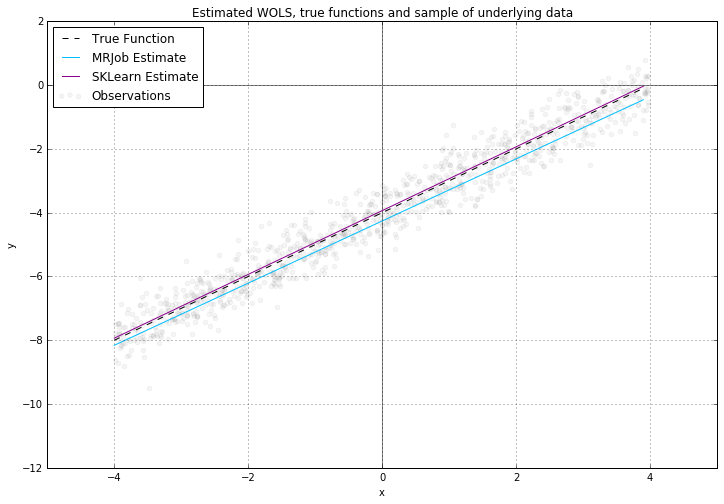

In [189]:
def plot_all():
    xStep = np.arange(-4, 4, 0.1)
    y_True = -4 + xStep
    y_MRJob = coefs[0] + coefs[1] * xStep
    y_SKLearn = lr.intercept_[0] + lr.coef_[0][0] * xStep

    plt.figure(figsize=(12,8))
    plt.grid(True)
    plt.axhline(0, color='grey')
    plt.axvline(0, color='grey')
    plt.scatter(x[:1000], y[:1000], marker='o', color='grey', alpha=0.08, label='Observations')
    trueFunction = plt.plot(xStep, y_True, color='black', ls='dashed', label='True Function')
    MRJobFunction = plt.plot(xStep, y_MRJob, color='deepskyblue', label='MRJob Estimate')
    SKLearnFunction = plt.plot(xStep, y_SKLearn, color='darkmagenta', label='SKLearn Estimate')
    plt.title('Estimated WOLS, true functions and sample of underlying data')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(loc='upper left')
    
plot_all()

The SKLearn estimate comes very close to the true function, while the MRJob estimate is slightly lower. This may be because we set the stop criteria to be too high. If we allowed for more iterations, we would likely come closer to the true function. However, this is also dependent on the starting points that the coefficients were initialized to.

## HW6.6: Clean up the GMM Notebook

Standalone notebook located here: http://nbviewer.jupyter.org/github/mseltz/W261-Fall2016/blob/master/Week06/MIDS-W261-2016-HWK-Week06-Seltzer_GMMviaEM.ipynb

## HW6.7: Implement Bernoulli Mixture Model via EM
### Implement the EM clustering algorithm to determine Bernoulli Mixture Model for discrete data in MRJob.

### As a unit test use the dataset in the following slides: https://www.dropbox.com/s/maoj9jidxj1xf5l/MIDS-Live-Lecture-06-EM-Bernouilli-MM-Systems-Test.pdf?dl=0

### Cross-check that you get the same cluster assignments and cluster Bernouilli models as presented in the slides after 25 iterations. Don't forget the smoothing.

In [3]:
import json

# We need to get the unit test data into the correct format
data = {1: 'hot chocolate cocoa beans',
        2: 'cocoa ghana africa',
        3: 'beans harvest ghana',
        4: 'cocoa butter',
        5: 'butter truffles',
        6: 'sweet chocolate',
        7: 'sweet sugar',
        8: 'sugar cane brazil',
        9: 'sweet sugar beet',
        10: 'sweet cake icing',
        11: 'cake black forest'}

# Collect the vocabulary of these documents
vocab = set()
for doc in data:
    words = data[doc].split()
    for word in words:
        vocab.add(word)
vocabList = list(vocab)

# Binarize the data according to our vocabulary
binaryData = []

for doc in data:
    binarized = [0.0]*len(vocabList)
    words = data[doc].split()
    for word in words:
        binarized[vocabList.index(word)] = 1.0
    binaryData.append(binarized)

with open('BMM_unit_data.txt', 'w') as f:
    for row in binaryData:
        json.dump(row, f)
        f.write('\n')

### Initialization
Assumption is that we know that there are 4 components to the model (2 in the case of the unit test).

Variable names equate to equations (1), (2) and (4) as follows (we no longer need covariances):
- `phi` is the array containing each $\pi_k$ and are the prior class probabilities
- `centroids` is the array containing each $\mu_k$ and are the current means

In [321]:
%%writefile MR_BMM_EM_Initialize.py
from mrjob.job import MRJob
import numpy as np
from random import sample
import json

class BMM_EM_Initialize(MRJob):
    
    """
    Job configuration details
    """
    # Set default protocol
    DEFAULT_PROTOCOL='json'
    
    # Define initializer
    def __init__(self, *args, **kwargs):
        super(BMM_EM_Initialize, self).__init__(*args, **kwargs)
        
        # Set number of mappers
        self.numMappers = 1
        
        # Initialize count
        self.count = 0
        
    # Configure job options
    def configure_options(self):
        super(BMM_EM_Initialize, self).configure_options()
        self.add_passthrough_option('--k', dest='k', default=4, type='int', 
                                    help='k: number of densities in mixture')
        self.add_passthrough_option('--pathName', dest='pathName', default='', type='str',
                                    help='pathName: path name where intermediateResults.txt is stored')
        
    """
    Mapper
    - Output a few data points to initialize centroids
    """
    def mapper(self, _, line):
        # We are going to just output 2 * k points
        if self.count < 2 * self.options.k:
            self.count += 1
            yield (1, line)
            
    """
    Reducer
    - Essentially, this is an identity reducer, but we need to initialize centroids
    - Collect the 2 * k points from the mapper, choose k of them for starting points
    - Emit all values
    """
    def reducer(self, key, values):
        
        #############################################
        # Initialize centroids
        #############################################
        
        k = self.options.k
        sampleCentroids = []
        
        # Append each point from the mapper to centroids
        # After appending, emit them
        for val in values:
            sampleCentroids.append(json.loads(val))
            yield 1, val
            
        # Sample k points from the sample centroids list

        sampleIndex = sample(range(len(sampleCentroids)), k)

        centroids = []
        for i in sampleIndex:
            centroids.append(sampleCentroids[i])
        
#         """
#         For unit test, set the starting centroids explicitly
#         """        
#         centroids = []
#         centroids.append([0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
#         centroids.append([0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0])
    
        # centroids = our starting centroid points
        
        
        #############################################
        # Use 1/k as the starting guess for the phis
        #############################################
        
        phi = np.zeros(k, dtype=float)
        
        for i in range(k):
            phi[i] = 1.0/float(k)
            
            
        #############################################
        # Output our initializations
        #############################################
        
        outputList = [phi.tolist(), centroids]
        jsonOut = json.dumps(outputList)
        
        # Write to file
        fullPath = self.options.pathName + 'intermediateResults.txt'
        with open(fullPath, 'w') as outfile:
            outfile.write(jsonOut)
            
        
if __name__ == '__main__':
    BMM_EM_Initialize.run()

Overwriting MR_BMM_EM_Initialize.py


### Iteration
Assumption is that we know that there are 4 components to the model (5 in the case of the unit test).

Variable names equate to equations (1), (2) and (4) as follows:
- `weightVector` is the array of weights for each data point, where `weightVector[k]` is $p \big( \omega_k \given[\big] \boldsymbol{x}^{(i)}, \theta \big)$
- Weight for each data component is now defined from the Bernoulli probability density function: $P_\mu(\boldsymbol{x})=\prod_{i=1}^N \mu_i^{x_i} (1-\mu_i)^{1-x_i}$
- We use log probabilities to prevent underflow: $log(P_\mu(\boldsymbol{x}))=\sum_{i=1}^N\big[ x_i log(\mu_i) + (1-x_i) log(1-\mu_i)\big]$
- `new_phi` is the partial sums of the `phi` values
- `new_centroids` is the partial sums of the `centroids` values
- These arrays are then totaled, and divided appropriately in the reducer to yield `finalPhi` and `finalCentroids`.

In [336]:
%%writefile MR_BMM_EM_Iterate.py
from mrjob.job import MRJob
import numpy as np
import json
from math import pi, sqrt, exp, pow, log
from decimal import *

# Helper function to determine probability of x
# given mean (mu)
# See equation (0)
def bernoulliLogProb(x, mu):
    # Use logs here!
    n = len(x)
    logProb = 0
    for i in range(n):
        if mu[i] ** x[i] * (1 - mu[i]) ** (1 - x[i]) == 0:
            logProb = float('-inf')
            break
        elif mu[i] ** x[i] * (1 - mu[i]) ** (1 - x[i]) == 1:
            logProb += 0.0
        else:
            logProb += x[i] * log(mu[i]) + (1 - x[i]) * log(1 - mu[i])
    return logProb

class BMM_EM_Iterate(MRJob):
    
    """
    Job configuration details
    """
    # Set default protocol
    DEFAULT_PROTOCOL='json'
    
    # Define initializer
    def __init__(self, *args, **kwargs):
        super(BMM_EM_Iterate, self).__init__(*args, **kwargs)
        
        # Read input from JSON
        fullPath = self.options.pathName + 'intermediateResults.txt'
        with open(fullPath,'r') as infile:
            inputJSON = infile.read()
        inputList = json.loads(inputJSON)
        
        # Initialize prior class probabilities (phi), centroids and covariances
        self.phi = np.array(inputList[0])
        self.centroids = np.array(inputList[1])
        
        # Initialize partial sums
        self.new_phi = np.zeros_like(self.phi)
        self.new_centroids = np.zeros_like(self.centroids)
        
        # Set number of mappers
        self.numMappers = 1
        
        # Initialize count
        self.count = 0
        
    # Configure job options
    def configure_options(self):
        super(BMM_EM_Iterate, self).configure_options()
        self.add_passthrough_option('--k', dest='k', default=3, type='int', 
                                    help='k: number of densities in mixture')
        self.add_passthrough_option('--pathName', dest='pathName', default='', type='str',
                                    help='pathName: path name where intermediateResults.txt is stored')
        
    """
    Mapper
    - accumulate partial sums
    """
    def mapper(self, _, line):
        
        k = self.options.k
        
        #############################################
        # Expectation step: equation (1)
        # Calculated for each data point
        # weightVector[k] = p(w_k | x(i), theta)
        # where i is data point and k is the component
        #############################################
        
        x = np.array(json.loads(line))
        weightVector = np.zeros_like(self.phi)
        for i in range(k):
            weightVector[i] = Decimal(log(self.phi[i]) + bernoulliLogProb(x, self.centroids[i])).exp()
        
        if sum(weightVector) == 0:
            weightVector += .0001
        weightVector /= sum(weightVector)
        
        #############################################
        # Maximization step part 1: 
        # Partial sums for equations (2), (3) and (4)
        #############################################
        
        self.count += 1
        
        # Equation (4)
        self.new_phi += weightVector
        
        # Equation (2): partial sum for weighted xs
        for i in range(k):
            self.new_centroids[i] += weightVector[i] * x

        
    """
    Mapper Final
    - emit partially accumulated count, phi, centroids and covariances
    """
    def mapper_final(self):
        out = [self.count, (self.new_phi).tolist(), (self.new_centroids).tolist()]
        jOut = json.dumps(out)
        yield 1, jOut
    
    """
    Reducer
    - accumulate partial sums of count, phi, centroids and covariances
    - each of phi, centroids and covariance inverses are length k
    - divide
    """
    def reducer(self, key, values):
        k = self.options.k
        first = True
        
        for val in values:
            
            # If this is the first record, initialize sums
            if first:
                fields = json.loads(val)
                
                totalCount = fields[0]
                totalPhi = np.array(fields[1])
                totalCentroids = np.array(fields[2])
                first = False
            
            # If this isn't the first, accumulate
            else:
                fields = json.loads(val)
                
                totalCount += fields[0]
                totalPhi += np.array(fields[1])
                totalCentroids += np.array(fields[2])
        
        # Finally divide
        # This finalizes equation (4)
        finalPhi = totalPhi / totalCount
        
        # Make a copy so that we know these are the right dimensions
        finalCentroids = np.array(totalCentroids)
   
        # This finalizes equation (2)
        for i in range(k):
            finalCentroids[i, :] = totalCentroids[i, :] / totalPhi[i]
            
        # Create output
        outputList = [finalPhi.tolist(), finalCentroids.tolist()]
        jsonOut = json.dumps(outputList)
                
        # Write to file
        fullPath = self.options.pathName + 'intermediateResults.txt'
        with open(fullPath, 'w') as outfile:
            outfile.write(jsonOut)
            
    
if __name__ == '__main__':
    GMM_EM_Iterate.run()

Overwriting MR_BMM_EM_Iterate.py


### Driver

In [339]:
from MR_BMM_EM_Initialize import BMM_EM_Initialize
from MR_BMM_EM_Iterate import BMM_EM_Iterate

import json
from math import sqrt

# Helper to calculate Euclidean distance
def dist(x, y):
    sum = 0.0
    for i in range(len(x)):
        sum += (x[i] - y[i]) ** 2
    return sqrt(sum)

def run_bmm(filePath, k):
    # Run the initializer to get the starting centroids
    myPathName = '/home/cloudera/Documents/W261-Fall2016/Week06/'
    mrJobInit = BMM_EM_Initialize(args=[filePath, '--pathName', myPathName, '--k=' + str(k), '--no-strict-protocol'])

    with mrJobInit.make_runner() as runner:
        runner.run()

    # Read the initialized values for first comparison
    intermediatePath = 'intermediateResults.txt'
    with open(intermediatePath, 'r') as f:
        paramJSON = f.read()

    # Initialize delta and iteration
    delta = 10
    iteration = 0
    allIterations = []

    # For unit test
    testWords = ['africa', 'brazil', 'cocoa', 'sugar', 'sweet']

    oldParam = json.loads(paramJSON)
    oldCentroids = oldParam[1]

    allIterations.append(oldParam)

    while delta > 0.02:
        iteration += 1

        # Parse old centroid values
        oldParam = json.loads(paramJSON)
        oldCentroids = oldParam[1]

        # Run one iteration of algorithm
        mrJobIterate = BMM_EM_Iterate(args=[filePath, '--pathName', myPathName, '--k=' + str(k), '--no-strict-protocol'])
        with mrJobIterate.make_runner() as runner:
            runner.run()

        # Compare new centroids to old centroids
        with open(intermediatePath,'r') as infile:
            paramJSON = infile.read()

        newParam = json.loads(paramJSON)

        k = len(newParam[1])
        newCentroids = newParam[1]
        newWeights = newParam[0]

        delta = 0.0
        for i in range(k):
            delta += dist(newCentroids[i], oldCentroids[i])

        allIterations.append(newParam)
    return allIterations

### Results of unit test

These results match the IR example closely after 15-20 iterations. If we changed the delta threshold, we might get results closer to the book.

In [315]:
allIterations = run_bmm('BMM_unit_data.txt', 2)
lastResult = allIterations[-1]

# Final output
print 'After convergence:'
print '------------------'
print '\nIterations:', len(allIterations)
print '\nalpha1:', lastResult[0][0]

# For unit test
for word in testWords:
    print '\nq', word, '1: ', lastResult[1][0][vocabList.index(word)]
    print 'q', word, '2: ', lastResult[1][1][vocabList.index(word)]

After convergence:
------------------

Iterations: 21

alpha1: 0.472493123457

q africa 1:  0.18503348218
q africa 2:  0.00660094327628

q brazil 1:  0.0292275454314
q brazil 2:  0.146157860884

q cocoa 1:  0.531261325423
q cocoa 2:  0.0411557662496

q sugar 1:  0.0326089966901
q sugar 2:  0.487803586021

q sweet 1:  0.013033804662
q sweet 2:  0.677674541238


### As a full test: use the same dataset from HW 4.5, the Tweet Dataset. Using this data, you will implement a 1000-dimensional EM-based Bernoulli Mixture Model algorithm in MrJob on the users by their 1000-dimensional word stripes/vectors using K = 4.  Use the same smoothing as in the unit test.

In [375]:
import csv

# We need to get our data into the right form (binarize and frequencies)
Y = []
X = []
Xfreq = []
outfile = open('BMM_data.txt', 'w')
outfile2 = open('BMM_freq_data.txt', 'w')

with open('topUsers_Apr-Jul_2014_1000-words.txt', 'r') as infile:
    for line in csv.reader(infile):
        Y.append(int(line[1]))
        
        X_i = [float(int(x) > 0) for x in line[3:]]
        X.append(X_i)
        
        json.dump(X_i, outfile)
        outfile.write('\n')        
        
        Xfreq_i = [int(x) for x in line[3:]]
        Xfreq.append(Xfreq_i)
        
        json.dump(Xfreq_i, outfile2)
        outfile2.write('\n')

outfile.close()
outfile2.close()

In [340]:
allIterations = run_bmm('BMM_data.txt', 4)
lastResult = allIterations[-1]
finalCentroids = lastResult[1]

### Get the cluster assignments according to the final centroids

In [372]:
from decimal import *
from math import log
import numpy as np

def bernoulliLogProb(x, mu):
    # Use logs here!
    n = len(x)
    logProb = 0
    for i in range(n):
        if mu[i] ** x[i] * (1 - mu[i]) ** (1 - x[i]) == 0:
            logProb = float('-inf')
            break
        elif mu[i] ** x[i] * (1 - mu[i]) ** (1 - x[i]) == 1:
            logProb += 0.0
        else:
            logProb += x[i] * log(mu[i]) + (1 - x[i]) * log(1 - mu[i])
    return logProb

allWeights = []
for x in X:
    weights = np.zeros((len(finalCentroids)))
    for i in range(k):
        weights[i] = Decimal(bernoulliLogProb(x, finalCentroids[i])).exp()

    if sum(weights) == 0:
        weights += .0001
    weights /= sum(weights)
    allWeights.append(weights)    

In [374]:
# Go through all the weights and pick out the index of the max probability
# If there is a tie, go with the class that occurs the most frequently
Y_BMM = []

for i in range(len(allWeights)):
    if np.all(allWeights[i] == allWeights[i][0]):
        Y_BMM.append(np.argmax(sum(allWeights)) + 1)
    else:
        Y_BMM.append(np.argmax(allWeights[i]) + 1)

### Repeat this experiment using your KMeans MRJob implementation fron HW4.

In [390]:
# Use the centroids generated in HW4 KMeans as one benchmark
# Remember that this KMeans was done on the frequency counts, not the binarized data

# Calculate find the nearest centroid for data point 
def MinDist(datapoint, centroid_points):
    datapoint = np.array(datapoint)
    centroid_points = np.array(centroid_points)
    diff = datapoint - centroid_points 
    diffsq = diff*diff
    # Get the nearest centroid for each instance
    minidx = np.argmin(list(diffsq.sum(axis = 1)))
    return minidx

with open('KMean_Centroids_HW4.txt', 'r') as myfile:
    centroids_KMeans = [map(float,s.split('\n')[0].split(',')) for s in myfile.readlines()]
    
Y_KMeans = []

for x in Xfreq:
    Y_KMeans.append(int(MinDist(x,centroids_KMeans)) + 1)

### Report the Rand index score using the class code as ground truth label for both algorithms and comment on your findings.

In [391]:
from sklearn.metrics.cluster import adjusted_rand_score

print "Comparing Y (truth) to BMM:   ", adjusted_rand_score(Y_BMM, Y)
print "Comparing Y (truth) to KMeans:", adjusted_rand_score(Y_KMeans, Y)

Comparing Y (truth) to BMM:    0.455687380905
Comparing Y (truth) to KMeans: 0.705458214192


In this case, the KMeans algorithm (using trained centroid initialization) has a larger Rand index than the Bernoulli Mixture Model via EM. This is expected, since we are "cheating" in a way by using the true classes to initialize the centroids in the KMeans algorithm. Both algorithms are heavily dependent on the initialization methods used, so the Rand index of the BMM may fluctuate greatly depending on the starting centroids used.